# 0.) Import the Credit Card Fraud Data From CCLE

In [5]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

In [6]:
df = pd.read_csv("fraudTest.csv")

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [31]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/0b/cv8kv48n20d8081ppp42wrkm0000gn/T/ipykernel_17373/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/0b/cv8kv48n20d8081ppp42wrkm0000gn/T/ipykernel_17373/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
X_train_df, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [68]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [70]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [102]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X_df, smote_y = smote.fit_resample(X_train_df, y_train)
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [103]:
len(y_train)

389003

In [105]:
len(y_train)

389003

# 3.) Train three logistic regression models

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [113]:
over_log.score(X_test, y_test)

0.9136375632812688

In [114]:
under_log.score(X_test, y_test)

0.9267496820941001

In [115]:
smote_log.score(X_test, y_test)

0.9142493821828739

In [116]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

All of the tests are relatively the same.

# 5.) Which performed best in Out of Sample metrics?

In [117]:
# Sensitivity here in credit fraud is more important as seen from last class

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
y_true = y_test

In [120]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75946,  7117],
       [   82,   213]])

In [121]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7220338983050848


In [122]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77039,  6024],
       [   82,   213]])

In [123]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7220338983050848


In [124]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75997,  7066],
       [   82,   213]])

In [125]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7220338983050848


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [126]:
raw_temp = pd.concat([X_train_df, y_train], axis =1)
raw_temp

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
429760,207.21,55345,58,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0
31607,12.01,276,47,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0
469502,204.60,144160,20,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0
65175,46.40,1493,35,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0
312670,28.26,1530,46,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428030,20.06,1423,53,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0
278277,7.01,910148,58,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0
450480,104.28,12335,57,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
424284,48.53,725,6,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0


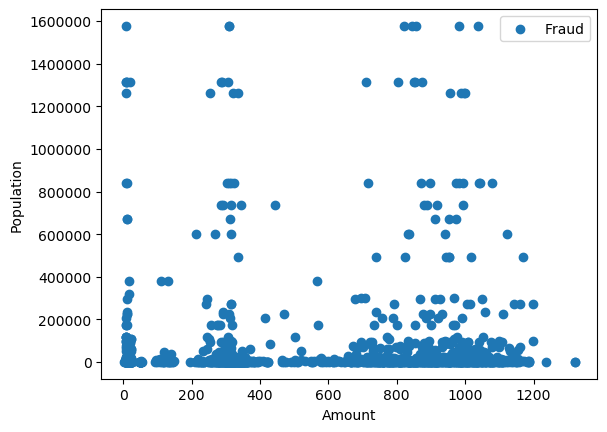

In [127]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [128]:
raw_temp = pd.concat([smote_X_df, smote_y], axis =1)


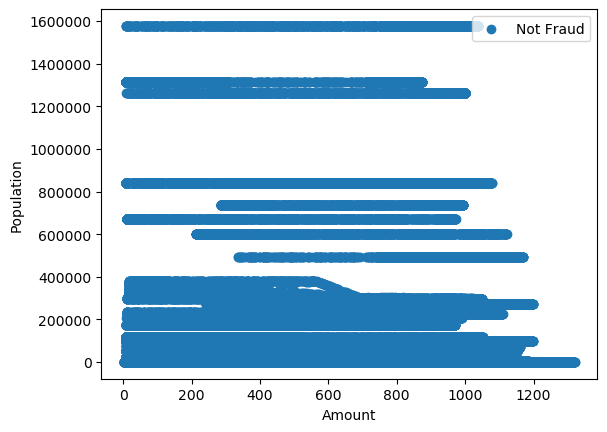

In [129]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [130]:
#smote filled in the values in between features

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [134]:
resampling_methods = {
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    "LOG": LogisticRegression(),
    "LASSO": LogisticRegression(penalty="l1", solver = "liblinear", C=2.),
    "DecisionTree": DecisionTreeClassifier()
}

In [146]:
def calc_perf_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return (sensitivity, specificity, precision, recall, f1) 

In [147]:
trained_models = {}
results = []

In [148]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)

    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        m =  model.fit(resample_X, resample_y)
        trained_models[combined_key] = m
        y_pred = m.predict(X_test)
        sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_test, y_pred)
        results.append({"Model": combined_key,
                       "Sensitivity": sensitivity,
                       "Specificity": specificity,
                       "Precision": precision,
                       "Recall": recall,
                       "F1": f1})

In [150]:
result_df = pd.DataFrame(results)
result_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.722034,0.916124,0.029666,0.722034,0.056990
1,over_LASSO,0.722034,0.916184,0.029686,0.722034,0.057028
2,over_DecisionTree,0.549153,0.998543,0.572438,0.549153,0.560554
3,under_LOG,0.722034,0.908973,0.027399,0.722034,0.052795
4,under_LASSO,0.722034,0.908286,0.027200,0.722034,0.052424
5,under_DecisionTree,0.969492,0.947570,0.061625,0.969492,0.115883
6,smote_LOG,0.722034,0.913680,0.028850,0.722034,0.055483
7,smote_LASSO,0.722034,0.913668,0.028846,0.722034,0.055476
8,smote_DecisionTree,0.671186,0.992464,0.240291,0.671186,0.353887


In terms of the sampling techniques, we see that undersampling seems to perform the best in ensuring high sensitivity, recall and f1-scores, while it is weaker in ensuring high specificity compared to oversampling and SMOTE which perform almost the same. Additionally, it seems that oversampling performs the best in ensuring higher precision than the other two sampling techniques. Overall, no sampling method totally outperforms the others, however it seems here that undersampling might be the strongest overall.

As for the model performance, looking at the F1-score for overall performance, we see that the Decision Tree models have a much higher score, regardless of sampling technique. Overall, we see that the decision tree model with oversampling performs the best, with an F1-score around 0.56. Therefore, we will test on holdout using this model below.

In [152]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

In [157]:
model = DecisionTreeClassifier()
fitted_model = model.fit(over_X, over_y)
y_pred = m.predict(X_holdout)
sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_holdout, y_pred)
holdout_results = pd.DataFrame([{"Sensitivity": sensitivity,
                       "Specificity": specificity,
                       "Precision": precision,
                       "Recall": recall,
                       "F1": f1}])
holdout_results

,Sensitivity,Specificity,Precision,Recall,F1
0,0.734756,0.993039,0.294261,0.734756,0.420227


Testing on holdout here, we see that there is high sensitivty and specificity, and the F1-score relatively high, especially when comparing to the F1-scores seen in the results above where all values besides that of the 'over_DecisionTree' were around 0.35 and under. Therefore, this further supports that this is the best model.